In [23]:
import pandas as pd

df = pd.read_excel("C:/Users/Sara Goyal/OneDrive/Desktop/SEM-4(DSEB)/Absenteeism_at_work.xlsx")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import calendar

### 5.1 Health-Linked Absences and Medical Classification

a) Test Results : U-statistic: 88,301.0 with p-value: 7.46 × 10⁻³⁶

H₀: The average absenteeism time for ICD-related absences is less than or equal 
to that for non-ICD-related absences (μ_ICD ≤ μ_non-ICD). 
H₁: The average absenteeism time for ICD-related absences is greater than that for 
non-ICD-related absences (μ_ICD > μ_non-ICD). 

Given the extremely small p-value, we reject the null hypothesis, providing strong 
evidence that ICD-related absences are associated with significantly longer absenteeism 
than non-ICD-related absences. 

In [4]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the file with correct separator
df = pd.read_excel("C:/Users/Sara Goyal/OneDrive/Desktop/SEM-4(DSEB)/Absenteeism_at_work.xlsx")

# Convert Reason for absence to int for filtering
df['Reason for absence'] = df['Reason for absence'].astype(int)

# Split into ICD (1–21) and non-ICD (22–28) groups
icd_group = df[df['Reason for absence'].between(1, 21)]
non_icd_group = df[df['Reason for absence'].between(22, 28)]

# Use Mann-Whitney U test (non-parametric test for independent samples)
stat, p = mannwhitneyu(
    icd_group['Absenteeism time in hours'],
    non_icd_group['Absenteeism time in hours'],
    alternative='greater'  # Testing if ICD group has greater absenteeism
)

print(f"U-statistic: {stat}, p-value: {p}")

U-statistic: 88301.0, p-value: 7.461505774526413e-36


b)

H₀: The absenteeism time distributions are the same across all ICD illness 
categories. 

H₁: At least one ICD illness category is associated with a significantly different 
absenteeism time distribution. 


Test Results: H-statistic: 306.67 with p-value: 9.76 × 10⁻⁵⁰ 

Given the extremely small p-value, we reject the null hypothesis, providing strong 
evidence that absenteeism time varies significantly across illness categories. 

Kruskal-Wallis H-statistic: 306.67266905487395
p-value: 9.75920304138778e-50
Reject the null hypothesis: At least one ICD illness category has a significantly different absenteeism time distribution.


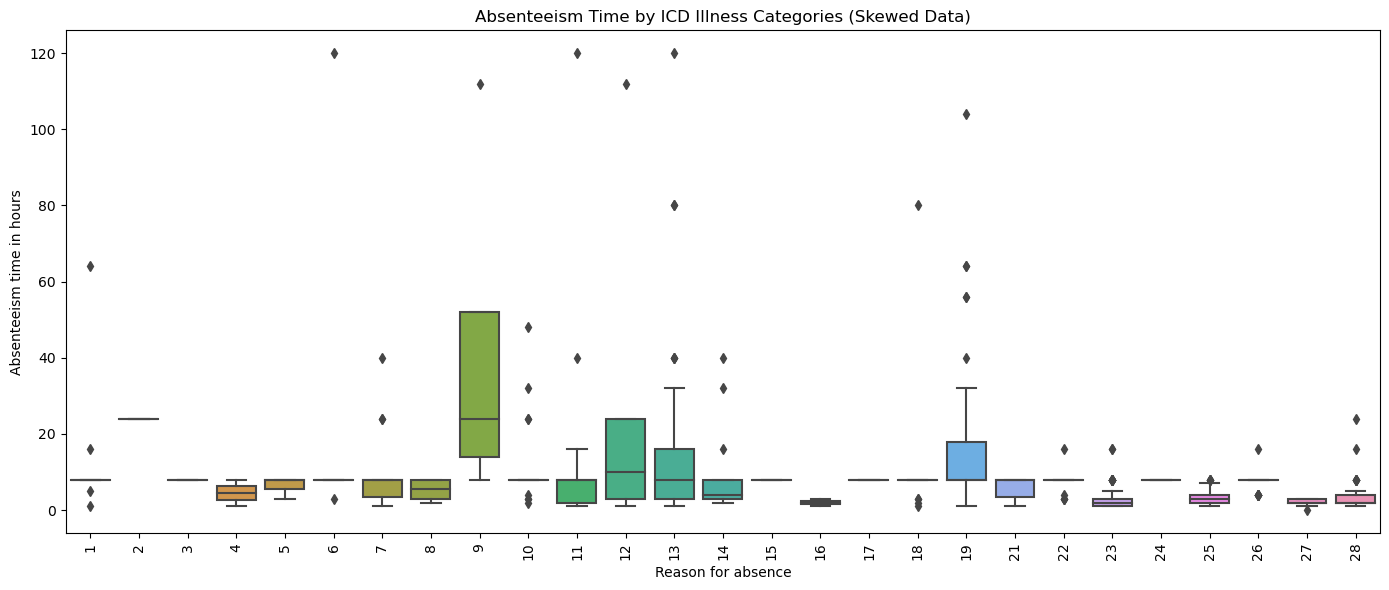

In [5]:
import pandas as pd
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

# Filter: Remove rows with no illness (Reason for absence = 0)
df = df[df['Reason for absence'] != 0]

# Drop NA values
df = df.dropna(subset=['Absenteeism time in hours', 'Reason for absence'])

# Group absenteeism times by ICD reason
grouped = df.groupby('Reason for absence')['Absenteeism time in hours'].apply(list)

# Apply Kruskal-Wallis test
kruskal_stat, kruskal_p = kruskal(*grouped)

# Print results
print("Kruskal-Wallis H-statistic:", kruskal_stat)
print("p-value:", kruskal_p)

# Interpretation
if kruskal_p < 0.05:
    print("Reject the null hypothesis: At least one ICD illness category has a significantly different absenteeism time distribution.")
else:
    print("Fail to reject the null hypothesis: No significant difference in absenteeism time across ICD illness categories.")

# Optional: Boxplot for visualization
plt.figure(figsize=(14, 6))
sns.boxplot(x='Reason for absence', y='Absenteeism time in hours', data=df)
plt.xticks(rotation=90)
plt.title('Absenteeism Time by ICD Illness Categories (Skewed Data)')
plt.tight_layout()
plt.show()

### 5.2 Commute Distance and Transportation Costs

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


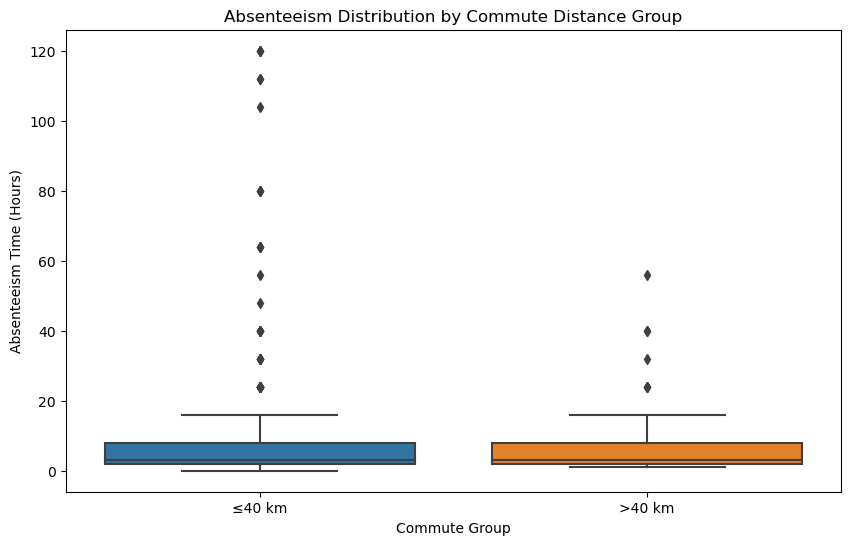

Mann-Whitney U Statistic: 48633.0
One-tailed p-value: 0.6972
Fail to reject the null hypothesis: No significant difference in absenteeism between the two commute groups.


In [6]:
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns



# Inspect relevant columns
# Distance is in 'Distance from Residence to Work'
# Absenteeism is in 'Absenteeism time in hours'
# Print the available columns to verify their names
print(df.columns)  

# Access columns using their actual names, correcting any typos if necessary
# For example, if the actual column name is 'Distance to Work', change it accordingly
df = df[['Distance from Residence to Work', 'Absenteeism time in hours']].dropna()  

# Create a binary group based on the 40 km threshold
df['Commute_Group'] = df['Distance from Residence to Work'].apply(lambda x: '>40 km' if x > 40 else '≤40 km')

# Split data into two groups
absent_above_40 = df[df['Commute_Group'] == '>40 km']['Absenteeism time in hours']
absent_below_40 = df[df['Commute_Group'] == '≤40 km']['Absenteeism time in hours']

# Plot distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Commute_Group', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Distribution by Commute Distance Group')
plt.ylabel('Absenteeism Time (Hours)')
plt.xlabel('Commute Group')
plt.show()

# Perform one-tailed Mann-Whitney U test
# Alternative is 'greater' because we expect greater absenteeism for >40 km
u_stat, p_value = mannwhitneyu(absent_above_40, absent_below_40, alternative='greater')

# Output results
print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"One-tailed p-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Employees commuting >40km have significantly higher absenteeism.")
else:
    print("Fail to reject the null hypothesis: No significant difference in absenteeism between the two commute groups.")

H₀: There is no difference or the absenteeism time for long commutes is less than or 
equal to short commutes (μ_long ≤ μ_short). 

H₁: Absenteeism time is greater for employees with longer commutes (μ_long > μ_short). 
Test Results : U-statistic: 55,197.0 and One-tailed p-value: 0.4968 

Since the p-value exceeds the standard significance threshold (p > 0.05), we fail to reject the null 
hypothesis. This result suggests that longer commute distances are not significantly associated 
with higher absenteeism in this sample. 

Implication: Overall, this suggests that absenteeism is less significantly associated with 
commuting burdens than might be intuitively expected, and may instead be shaped more by 
personal or organizational dynamics.  

### 5.3 Family Responsibilities and Seasonal Patterns

a)

H₀ : The number of children has no effect on absenteeism time.  

H₁ : The number of children is positively associated with absenteeism time. 

In [9]:
import statsmodels.api as sm

# Define your independent variable ('Son' column) and dependent variable (Absenteeism)
X = sm.add_constant(df['Son'])  # Adding a constant for the intercept
y = df['Absenteeism time in hours']

# Fit the GLM model with Negative Binomial family
glm_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Show the model summary
print(glm_model.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Absenteeism time in hours   No. Observations:                  740
Model:                                   GLM   Df Residuals:                      738
Model Family:               NegativeBinomial   Df Model:                            1
Link Function:                           Log   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -2207.4
Date:                       Fri, 25 Apr 2025   Deviance:                       856.51
Time:                               23:04:49   Pearson chi2:                 2.15e+03
No. Iterations:                            8   Pseudo R-squ. (CS):            0.04128
Covariance Type:                   nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

b)

H₀: There is no significant variation in absenteeism between months.  

H₁ : Absenteeism rates significantly vary across months. 


In [10]:
import statsmodels.api as sm

# Define your independent variable ('Month' column) and dependent variable (Absenteeism)
X = sm.add_constant(df['Month of absence'])  # Adding a constant for the intercept
y = df['Absenteeism time in hours']

# Fit the GLM model with Negative Binomial family
glm_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

# Show the model summary
print(glm_model.summary())

                     Generalized Linear Model Regression Results                     
Dep. Variable:     Absenteeism time in hours   No. Observations:                  740
Model:                                   GLM   Df Residuals:                      738
Model Family:               NegativeBinomial   Df Model:                            1
Link Function:                           Log   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                -2222.2
Date:                       Fri, 25 Apr 2025   Deviance:                       886.17
Time:                               23:05:27   Pearson chi2:                 2.38e+03
No. Iterations:                            7   Pseudo R-squ. (CS):           0.002079
Covariance Type:                   nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------

c)

Nevertheless, further analysis at a monthly level revealed an interesting pattern when 
comparing absenteeism between employees with and without children. Specifically, a 
noticeable spike in absenteeism occurred during the months of March, May, and July for 
employees with children. 

In [19]:
significant_months = [3, 5, 7]
significant_data = df[df['Month'].isin(significant_months)]


In [21]:
stats_df = pd.DataFrame(monthly_stats)

# Now this will work
print("Detailed Statistics for Significant Months:")
print(stats_df[['Month_Name', 'With_Kids_Mean', 'Without_Kids_Mean', 'Mean_Difference', 
                'Percent_Difference', 'P_Value', 'Cohen_d']])


Detailed Statistics for Significant Months:
  Month_Name  With_Kids_Mean  Without_Kids_Mean  Mean_Difference  \
0        Mar       11.547170               4.50         7.047170   
1        May        7.952381               3.00         4.952381   
2        Jul       14.452381               5.08         9.372381   

   Percent_Difference   P_Value   Cohen_d  
0          156.603774  0.021863  0.463992  
1          165.079365  0.015823  0.556802  
2          184.495688  0.029087  0.494867  


📊 Detailed Statistics for Significant Months:
  Month_Name  With_Kids_Mean  Without_Kids_Mean  Mean_Difference  \
0        Mar       11.547170               4.50         7.047170   
1        May        7.952381               3.00         4.952381   
2        Jul       14.452381               5.08         9.372381   

   Percent_Difference   P_Value   Cohen_d  
0          156.603774  0.021863  0.463992  
1          165.079365  0.015823  0.556802  
2          184.495688  0.029087  0.494867  


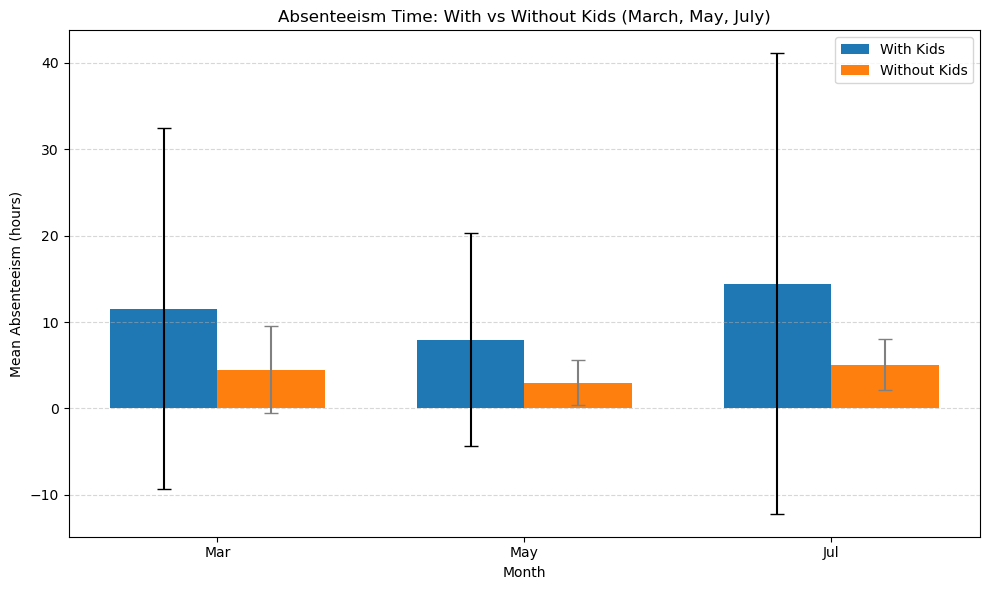

In [22]:


# 1. Rename column for ease of use
df.rename(columns={'Month of absence': 'Month'}, inplace=True)

# 2. Select significant months: March, May, July
significant_months = [3, 5, 7]
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 
             8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

# 3. Compute statistics
monthly_stats = []

for month in significant_months:
    month_data = df[df['Month'] == month]
    
    with_kids = month_data[month_data['Son'] > 0]['Absenteeism time in hours']
    without_kids = month_data[month_data['Son'] == 0]['Absenteeism time in hours']
    
    with_mean = with_kids.mean()
    without_mean = without_kids.mean()
    
    mean_diff = with_mean - without_mean
    percent_diff = (mean_diff / without_mean) * 100 if without_mean != 0 else np.nan
    
    # T-test
    t_stat, p_value = ttest_ind(with_kids, without_kids, equal_var=False, nan_policy='omit')
    
    # Cohen's d
    pooled_std = np.sqrt(((with_kids.std() ** 2) + (without_kids.std() ** 2)) / 2)
    cohen_d = mean_diff / pooled_std if pooled_std != 0 else np.nan
    
    monthly_stats.append({
        'Month_Name': month_map[month],
        'With_Kids_Mean': with_mean,
        'Without_Kids_Mean': without_mean,
        'Mean_Difference': mean_diff,
        'Percent_Difference': percent_diff,
        'P_Value': p_value,
        'Cohen_d': cohen_d
    })

# 4. Create DataFrame
stats_df = pd.DataFrame(monthly_stats)

# 5. Display Results
print("📊 Detailed Statistics for Significant Months:")
print(stats_df[['Month_Name', 'With_Kids_Mean', 'Without_Kids_Mean', 'Mean_Difference',
                'Percent_Difference', 'P_Value', 'Cohen_d']])

# 6. Visualization: Side-by-side bar chart with error bars
x = np.arange(len(stats_df))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, stats_df['With_Kids_Mean'], width, label='With Kids')
bars2 = ax.bar(x + width/2, stats_df['Without_Kids_Mean'], width, label='Without Kids')

# Add error bars (standard deviation shown as visual aid)
for i in range(len(stats_df)):
    month = significant_months[i]
    month_data = df[df['Month'] == month]
    std_with = month_data[month_data['Son'] > 0]['Absenteeism time in hours'].std()
    std_without = month_data[month_data['Son'] == 0]['Absenteeism time in hours'].std()
    ax.errorbar(x[i] - width/2, stats_df['With_Kids_Mean'][i], yerr=std_with, fmt='none', ecolor='black', capsize=5)
    ax.errorbar(x[i] + width/2, stats_df['Without_Kids_Mean'][i], yerr=std_without, fmt='none', ecolor='gray', capsize=5)

ax.set_xlabel('Month')
ax.set_ylabel('Mean Absenteeism (hours)')
ax.set_title('Absenteeism Time: With vs Without Kids (March, May, July)')
ax.set_xticks(x)
ax.set_xticklabels(stats_df['Month_Name'])
ax.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### 5.4:  Investigating Distinct Patterns in Employee Absenteeism Behavior 



Classification Report:

              precision    recall  f1-score   support

     Chronic       1.00      0.75      0.86         4
     Minimal       1.00      0.50      0.67         2
  Occasional       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.92      0.75      0.79        12
weighted avg       0.88      0.83      0.83        12



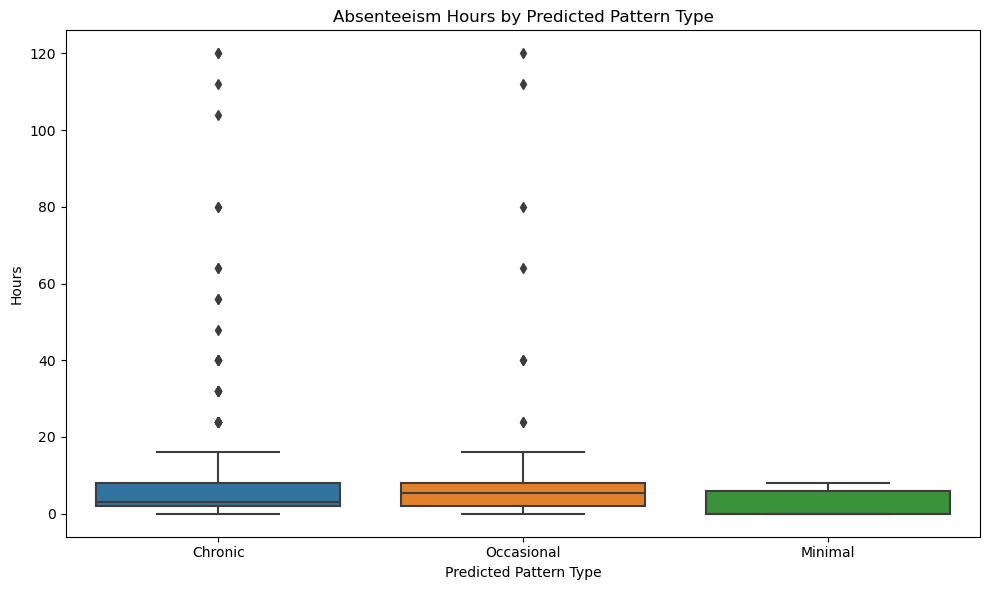

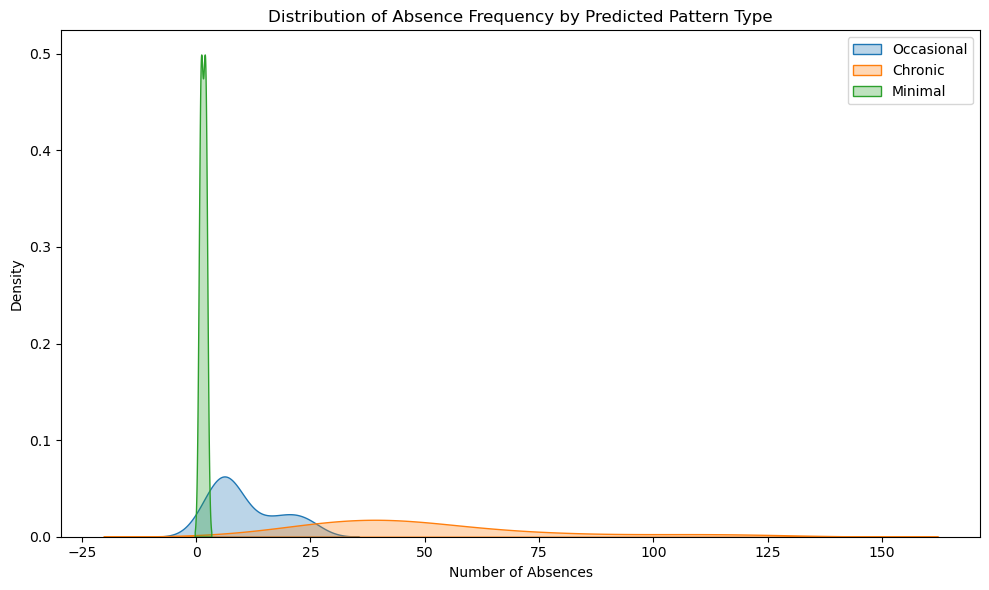

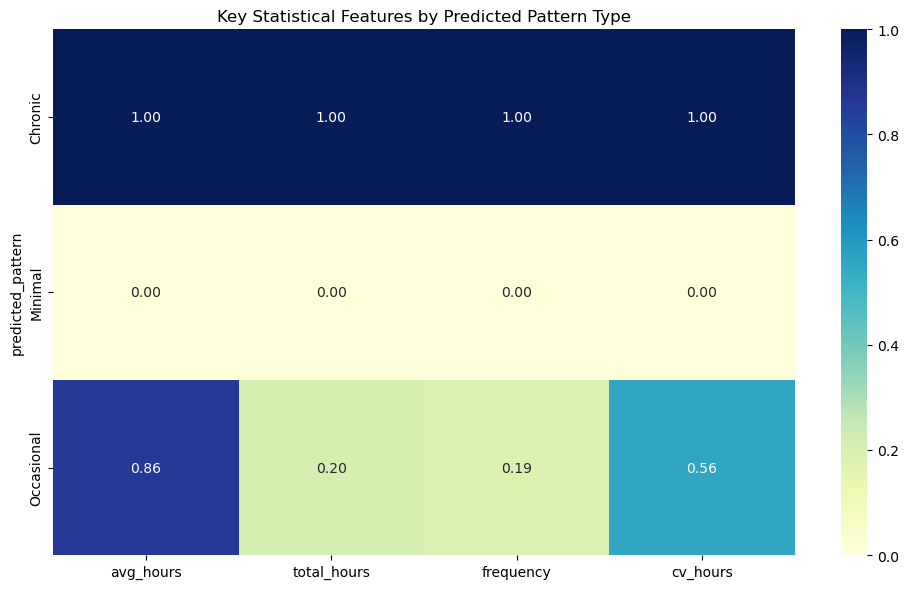

   id pattern_type predicted_pattern  confidence
0   1   Occasional        Occasional    0.692744
1   2   Occasional        Occasional    0.751217
2   3      Chronic           Chronic    0.998540
3   4      Minimal           Minimal    0.772361
4   5   Occasional        Occasional    0.728792


In [26]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Function to extract features
def extract_employee_features(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    if 'absenteeism_time_in_hours' not in df.columns:
        absent_cols = [col for col in df.columns if 'absent' in col.lower()]
        if absent_cols:
            df = df.rename(columns={absent_cols[0]: 'absenteeism_time_in_hours'})
        else:
            raise ValueError("No absenteeism column found in the dataset.")

    if 'id' not in df.columns:
        id_cols = [col for col in df.columns if 'id' in col.lower()]
        if id_cols:
            df = df.rename(columns={id_cols[0]: 'id'})
        else:
            df['id'] = range(1, len(df) + 1)

    employee_stats = df.groupby('id').agg({
        'absenteeism_time_in_hours': ['mean', 'sum', 'count', 'std']
    }).reset_index()

    employee_stats.columns = ['id', 'avg_hours', 'total_hours', 'frequency', 'std_hours']
    employee_stats['std_hours'].fillna(0, inplace=True)
    employee_stats['cv_hours'] = employee_stats['std_hours'] / employee_stats['avg_hours']
    employee_stats['cv_hours'].replace([np.inf, -np.inf], 0, inplace=True)
    employee_stats['cv_hours'].fillna(0, inplace=True)

    return employee_stats

# Function to assign pattern types based on thresholds (for training labels)
def assign_labels(df):
    freq_q75 = df['frequency'].quantile(0.75)
    freq_q25 = df['frequency'].quantile(0.25)
    hours_q75 = df['total_hours'].quantile(0.75)
    hours_q25 = df['total_hours'].quantile(0.25)

    conditions = []
    for _, row in df.iterrows():
        if row['frequency'] > freq_q75 or row['total_hours'] > hours_q75:
            conditions.append('Chronic')
        elif row['frequency'] < freq_q25 and row['total_hours'] < hours_q25:
            conditions.append('Minimal')
        else:
            conditions.append('Occasional')

    df['pattern_type'] = conditions
    return df

# Main function using logistic regression only
def classify_with_logistic_regression(raw_df):
    features_df = extract_employee_features(raw_df)
    labeled_df = assign_labels(features_df)

    X = labeled_df[['avg_hours', 'total_hours', 'frequency', 'cv_hours']]
    y = labeled_df['pattern_type']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

    labeled_df['predicted_pattern'] = clf.predict(X_scaled)
    probabilities = clf.predict_proba(X_scaled)
    labeled_df['confidence'] = np.max(probabilities, axis=1)

    visualize_patterns(labeled_df, raw_df)
    return labeled_df

# Visualization function
def visualize_patterns(employee_patterns, raw_data):
    data_with_patterns = raw_data.merge(
        employee_patterns[['id', 'predicted_pattern']], on='id', how='left')

    # 1. Boxplot of absenteeism hours by predicted pattern
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='predicted_pattern', y='absenteeism_time_in_hours', data=data_with_patterns)
    plt.title('Absenteeism Hours by Predicted Pattern Type')
    plt.ylabel('Hours')
    plt.xlabel('Predicted Pattern Type')
    plt.tight_layout()
    plt.show()

    # 2. Frequency distribution by predicted pattern
    plt.figure(figsize=(10, 6))
    for pattern in employee_patterns['predicted_pattern'].unique():
        subset = employee_patterns[employee_patterns['predicted_pattern'] == pattern]
        sns.kdeplot(subset['frequency'], label=pattern, fill=True, alpha=0.3)
    plt.title('Distribution of Absence Frequency by Predicted Pattern Type')
    plt.xlabel('Number of Absences')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 3. Heatmap of average feature values per pattern type
    viz_features = ['avg_hours', 'total_hours', 'frequency', 'cv_hours']
    pattern_stats = employee_patterns.groupby('predicted_pattern')[viz_features].mean()
    normalized_stats = pattern_stats.copy()
    for col in normalized_stats.columns:
        normalized_stats[col] = (normalized_stats[col] - normalized_stats[col].min()) / \
                                 (normalized_stats[col].max() - normalized_stats[col].min())

    plt.figure(figsize=(10, 6))
    sns.heatmap(normalized_stats, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Key Statistical Features by Predicted Pattern Type')
    plt.tight_layout()
    plt.show()

# Example usage:
df = pd.read_excel("C:/Users/Sara Goyal/OneDrive/Desktop/SEM-4(DSEB)/Absenteeism_at_work.xlsx")
result = classify_with_logistic_regression(df)
print(result[['id', 'pattern_type', 'predicted_pattern', 'confidence']].head())

The classification model is helpful in revealing valuable information regarding 
absenteeism patterns and can be used by HR departments to spot workers who would need 
interventions like flexible work schedules or further support. Organizations can better plan their 
workforce, proactively address absenteeism, and raise overall productivity and employee welfare 
with the knowledge of these patterns. 


For example, one key insight that we were able to draw was the striking difference in "reason 
consistency" between patterns reveals that employees with minimal absences typically cite the 
same reason when they miss work (0.64), while chronic absentees use a wide variety of different 
reasons (0.32). This suggests fundamentally different absence behaviors - minimal absentees 
likely have specific, legitimate constraints (e.g., scheduled medical treatments), while chronic 
absenteeism may experience multiple issues or potentially use strategic justifications for 
absences. 